<a href="https://colab.research.google.com/github/skysh77/deep_learning_report3/blob/main/sc2_ch8(20210526)_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### H.S Choi
+ Dept. of Urban Big Data Convergebce, University of Seoul

## 8.1 어텐션의 구조

+ seq2seq의 문제점과 개선 
  + seq2seq의 입력문장의 길이에 관계없는 고정길이 $\bf {}^eh$
  + <그림 8-2>에서 hs는 $T \times {\rm embedding ~dimension}$
  + hs 행렬의 마지막 행(마지막 입력시점 $T$)의 embedding vector
  
<a href="https://imgur.com/Je7uIDn"><img src="https://i.imgur.com/Je7uIDn.png" width="40%" /></a>
<a href="https://imgur.com/iUsjts4"><img src="https://i.imgur.com/iUsjts4.png" width="40%" /></a>




### 8.1.3 Decoder의 개선 1 

<a href="https://imgur.com/dla59cn"><img src="https://i.imgur.com/dla59cn.png" width="54%" /></a>
<a href="https://imgur.com/flNmE57"><img src="https://i.imgur.com/flNmE57.png" width="32%" /></a>

> 맥락벡터(context vector)  

+ $\bf {}^eh$s: $T \times H$ matrix 
+ $\underbrace{\bf a}_{1 \times T} \times \underbrace{\bf {}^eh}_{T \times H} = \underbrace{\bf c}_{H \times 1}$벡터를 맥락벡터라 함 
+ 이 때, $T \times 1$벡터 $\bf a$는? 

<a href="https://imgur.com/bkEzSqr"><img src="https://i.imgur.com/bkEzSqr.png" width="50%" /></a>



+ $\bf a$: $T \times 1$ 가중치 벡터  

<a href="https://imgur.com/YiuDvuk"><img src="https://i.imgur.com/YiuDvuk.png" width="51%" /></a> 
<a href="https://imgur.com/gDdsAqj"><img src="https://i.imgur.com/gDdsAqj.png" width="42%" /></a>


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd "/content/drive/My Drive/deep-learning-from-scratch-2-master"

/content/drive/My Drive/deep-learning-from-scratch-2-master


In [3]:
# 맥락벡터 
import numpy as np

T, H = 5, 4
hs = np.random.randn(T, H)
a = np.array([0.8, 0.1, 0.03, 0.05, 0.02])

ar = a.reshape(5, 1).repeat(4, axis=1)
print(ar.shape)
#(5, 4)

t = hs * ar
print(t.shape)
#(5, 4)

c = np.sum(t, axis=0)
print(c.shape)
#(4, )

(5, 4)
(5, 4)
(4,)


$\bf a$

$\bf h$s

<a href="https://imgur.com/5TPvR3Z"><img src="https://i.imgur.com/5TPvR3Z.png" width="40%" /></a>
<a href="https://imgur.com/1olmA1G"><img src="https://i.imgur.com/1olmA1G.png" width="40%" /></a>


### 미니배치용
N=10일 때, 

In [4]:
# p345
N, T, H = 10, 5, 4
hs = np.random.randn(N, T, H)
a = np.random.randn(N, T)
ar = a.reshape(N, T, 1).repeat(H, axis=2)
# ar = a.reshape(N, T, 1)

t = hs * ar
print(t.shape)

c = np.sum(t, axis=1)
print(c.shape)

(10, 5, 4)
(10, 4)


<a href="https://imgur.com/M66OKTc"><img src="https://i.imgur.com/M66OKTc.png" width="20%" /></a>


In [5]:
#p.346
class WeightSum:
    def __init__(self):
        self.params, self.grads = [], []
        self.cache = None

    def forward(self, hs, a):
        N, T, H = hs.shape

        ar = a.reshape(N, T, 1)#.repeat(T, axis=1)
        t = hs * ar
        c = np.sum(t, axis=1)

        self.cache = (hs, ar)
        return c

    def backward(self, dc):
        hs, ar = self.cache
        N, T, H = hs.shape
        dt = dc.reshape(N, 1, H).repeat(T, axis=1)
        dar = dt * hs
        dhs = dt * ar
        da = np.sum(dar, axis=2)

        return dhs, da
    

### 8.1.4 Decoder 개선 2

+ Decoder의 특정시점의 은닉벡터를 $\bf h^d$라 하자.
+ ${\bf h^d}$: $H \times 1$ 벡터 
+ encoder $\bf {}^eh$s: $T \times H$
+ $\bf {}^eh$s $\times {\bf h^d}$
+ $\underbrace{{\bf {}^eh}{s}}_{T \times H} \times \underbrace{{\bf h^d}}_{H \times 1} = \underbrace{\bf s}_{T \times 1}$ 스코어 벡터
+ ${\bf a}={\rm softmax}({\bf s})$

<a href="https://imgur.com/GrrtOG5"><img src="https://i.imgur.com/GrrtOG5.png" width="49%" /></a>




<a href="https://imgur.com/lvRJYoN"><img src="https://i.imgur.com/lvRJYoN.png" width="50%" /></a>
<a href="https://imgur.com/7jQ1QBF"><img src="https://i.imgur.com/7jQ1QBF.png" width="44%" /></a>



In [6]:
# p.350
import sys
sys.path.append('..')
from common.layers import Softmax
import numpy as np

N, T, H = 10, 5, 4
hs = np.random.randn(N, T, H)
h = np.random.randn(N, H)
hr = h.reshape(N, 1, H).repeat(T, axis=1)

t = hs * hr
print(t.shape)

s = np.sum(t, axis=2)
print(s.shape)

softmax=Softmax()
a = softmax.forward(s)
print(a.shape)


(10, 5, 4)
(10, 5)
(10, 5)


<a href="https://imgur.com/YiKXdZJ"><img src="https://i.imgur.com/YiKXdZJ.png" width="30%" /></a>


In [7]:
import sys
sys.path.append('.')
from common.np import *
from common.layers import Softmax

class AttentionWeight:
    def __init__(self):
        self.params, self.grads = [], []
        self.softmax = Softmax()
        self.cache = None

    def forward(self, hs, h):
        N, T, H = hs.shape

        hr = h.reshape(N, 1, H)#.repeat(T, axis=1)
        t = hs * hr
        s = np.sum(t, axis=2)
        a = self.softmax.forward(s)

        self.cache = (hs, hr)
        return a

    def backward(self, da):
        hs, hr = self.cache
        N, T, H = hs.shape

        ds = self.softmax.backward(da)
        dt = ds.reshape(N, T, 1).repeat(H, axis=2)
        dhs = dt * hr
        dhr = dt * hs
        dh = np.sum(dhr, axis=1)

        return dhs, dh

  

### 8.1.5 Decoder 개선 3

<a href="https://imgur.com/r1JXaCp"><img src="https://i.imgur.com/r1JXaCp.png" width="40%" /></a>
<a href="https://imgur.com/ZeNy6Be"><img src="https://i.imgur.com/ZeNy6Be.png" width="40%" /></a>


<a href="https://imgur.com/BsnOqyz"><img src="https://i.imgur.com/BsnOqyz.png" width="40%" /></a>
<a href="https://imgur.com/atwEru1"><img src="https://i.imgur.com/atwEru1.png" width="40%" /></a>

In [8]:
#p.354
class Attention:
    def __init__(self):
        self.params, self.grads = [], []
        self.attention_weight_layer = AttentionWeight()
        self.weight_sum_layer = WeightSum()
        self.attention_weight = None

    def forward(self, hs, h):
        a = self.attention_weight_layer.forward(hs, h)
        out = self.weight_sum_layer.forward(hs, a)
        self.attention_weight = a
        return out

    def backward(self, dout):
        dhs0, da = self.weight_sum_layer.backward(dout)
        dhs1, dh = self.attention_weight_layer.backward(da)
        dhs = dhs0 + dhs1
        return dhs, dh


<a href="https://imgur.com/4yHitBU"><img src="https://i.imgur.com/4yHitBU.png" width="60%" /></a>

In [9]:
class TimeAttention:
    def __init__(self):
        self.params, self.grads = [], []
        self.layers = None
        self.attention_weights = None

    def forward(self, hs_enc, hs_dec):
        N, T, H = hs_dec.shape
        out = np.empty_like(hs_dec)
        self.layers = []
        self.attention_weights = []

        for t in range(T):
            layer = Attention()
            out[:, t, :] = layer.forward(hs_enc, hs_dec[:,t,:])
            self.layers.append(layer)
            self.attention_weights.append(layer.attention_weight)

        return out

    def backward(self, dout):
        N, T, H = dout.shape
        dhs_enc = 0
        dhs_dec = np.empty_like(dout)

        for t in range(T):
            layer = self.layers[t]
            dhs, dh = layer.backward(dout[:, t, :])
            dhs_enc += dhs
            dhs_dec[:,t,:] = dh

        return dhs_enc, dhs_dec

    

## 8.2 Attention을 갖춘 seq2seq 구현

+ AttentionEncoder class

<a href="https://imgur.com/LagRRK9"><img src="https://i.imgur.com/LagRRK9.png" width="40%" /></a>


In [10]:
import sys
sys.path.append('..')
from common.time_layers import *
from ch07.seq2seq import Encoder, Seq2seq
from ch08.attention_layer import TimeAttention


class AttentionEncoder(Encoder):
    def forward(self, xs):
        xs = self.embed.forward(xs)
        hs = self.lstm.forward(xs)
        return hs

    def backward(self, dhs):
        dout = self.lstm.backward(dhs)
        dout = self.embed.backward(dout)
        return dout

In [11]:
#p.359
class AttentionDecoder:
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        rn = np.random.randn

        embed_W = (rn(V, D) / 100).astype('f')
        lstm_Wx = (rn(D, 4 * H) / np.sqrt(D)).astype('f')
        lstm_Wh = (rn(H, 4 * H) / np.sqrt(H)).astype('f')
        lstm_b = np.zeros(4 * H).astype('f')
        affine_W = (rn(2*H, V) / np.sqrt(2*H)).astype('f')
        affine_b = np.zeros(V).astype('f')

        self.embed = TimeEmbedding(embed_W)
        self.lstm = TimeLSTM(lstm_Wx, lstm_Wh, lstm_b, stateful=True)
        self.attention = TimeAttention()
        self.affine = TimeAffine(affine_W, affine_b)
        layers = [self.embed, self.lstm, self.attention, self.affine]

        self.params, self.grads = [], []
        for layer in layers:
            self.params += layer.params
            self.grads += layer.grads

    def forward(self, xs, enc_hs):
        h = enc_hs[:,-1]
        self.lstm.set_state(h)

        out = self.embed.forward(xs)
        dec_hs = self.lstm.forward(out)
        c = self.attention.forward(enc_hs, dec_hs)
        out = np.concatenate((c, dec_hs), axis=2)
        score = self.affine.forward(out)

        return score

    def backward(self, dscore):
        dout = self.affine.backward(dscore)
        N, T, H2 = dout.shape
        H = H2 // 2

        dc, ddec_hs0 = dout[:,:,:H], dout[:,:,H:]
        denc_hs, ddec_hs1 = self.attention.backward(dc)
        ddec_hs = ddec_hs0 + ddec_hs1
        dout = self.lstm.backward(ddec_hs)
        dh = self.lstm.dh
        denc_hs[:, -1] += dh
        self.embed.backward(dout)

        return denc_hs

    def generate(self, enc_hs, start_id, sample_size):
        sampled = []
        sample_id = start_id
        h = enc_hs[:, -1]
        self.lstm.set_state(h)

        for _ in range(sample_size):
            x = np.array([sample_id]).reshape((1, 1))

            out = self.embed.forward(x)
            dec_hs = self.lstm.forward(out)
            c = self.attention.forward(enc_hs, dec_hs)
            out = np.concatenate((c, dec_hs), axis=2)
            score = self.affine.forward(out)

            sample_id = np.argmax(score.flatten())
            sampled.append(sample_id)

        return sampled


In [12]:
#p.361
class AttentionSeq2seq(Seq2seq):
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        args = vocab_size, wordvec_size, hidden_size
        self.encoder = AttentionEncoder(*args)
        self.decoder = AttentionDecoder(*args)
        self.softmax = TimeSoftmaxWithLoss()

        self.params = self.encoder.params + self.decoder.params
        self.grads = self.encoder.grads + self.decoder.grads


#8.3 어텐션 평가
<a href="https://imgur.com/gCfTsHR"><img src="https://i.imgur.com/gCfTsHR.png" width="40%" /></a>


In [13]:
import sys
sys.path.append('..')
sys.path.append('../ch07')
import numpy as np
import matplotlib.pyplot as plt
from dataset import sequence
from common.optimizer import Adam
from common.trainer import Trainer
from common.util import eval_seq2seq
from ch08.attention_seq2seq import AttentionSeq2seq
from ch07.seq2seq import Seq2seq
from ch07.seq2seq import Seq2seq, Encoder


In [14]:
# 데이터 읽기
(x_train, t_train), (x_test, t_test) = sequence.load_data('date.txt')
char_to_id, id_to_char = sequence.get_vocab()

# 입력 문장 반전
x_train, x_test = x_train[:, ::-1], x_test[:, ::-1]

# 하이퍼파라미터 설정
vocab_size = len(char_to_id)
wordvec_size = 16
hidden_size = 256
batch_size = 128
max_epoch = 10
max_grad = 5.0

In [15]:
model = AttentionSeq2seq(vocab_size, wordvec_size, hidden_size)
# model = Seq2seq(vocab_size, wordvec_size, hidden_size)
# model = PeekySeq2seq(vocab_size, wordvec_size, hidden_size)

optimizer = Adam()
trainer = Trainer(model, optimizer)

acc_list = []
for epoch in range(max_epoch):
    trainer.fit(x_train, t_train, max_epoch=1,
                batch_size=batch_size, max_grad=max_grad)

    correct_num = 0
    for i in range(len(x_test)):
        question, correct = x_test[[i]], t_test[[i]]
        verbose = i < 10
        correct_num += eval_seq2seq(model, question, correct,
                                    id_to_char, verbose, is_reverse=True)

    acc = float(correct_num) / len(x_test)
    acc_list.append(acc)
    print('정확도 %.3f%%' % (acc * 100))


model.save_params()

| 에폭 1 |  반복 1 / 351 | 시간 0[s] | 손실 4.08
| 에폭 1 |  반복 21 / 351 | 시간 11[s] | 손실 3.09
| 에폭 1 |  반복 41 / 351 | 시간 22[s] | 손실 1.90
| 에폭 1 |  반복 61 / 351 | 시간 34[s] | 손실 1.72
| 에폭 1 |  반복 81 / 351 | 시간 45[s] | 손실 1.46
| 에폭 1 |  반복 101 / 351 | 시간 56[s] | 손실 1.19
| 에폭 1 |  반복 121 / 351 | 시간 67[s] | 손실 1.14
| 에폭 1 |  반복 141 / 351 | 시간 78[s] | 손실 1.09
| 에폭 1 |  반복 161 / 351 | 시간 89[s] | 손실 1.06
| 에폭 1 |  반복 181 / 351 | 시간 101[s] | 손실 1.04
| 에폭 1 |  반복 201 / 351 | 시간 112[s] | 손실 1.03
| 에폭 1 |  반복 221 / 351 | 시간 123[s] | 손실 1.02
| 에폭 1 |  반복 241 / 351 | 시간 134[s] | 손실 1.02
| 에폭 1 |  반복 261 / 351 | 시간 145[s] | 손실 1.01
| 에폭 1 |  반복 281 / 351 | 시간 156[s] | 손실 1.00
| 에폭 1 |  반복 301 / 351 | 시간 168[s] | 손실 1.00
| 에폭 1 |  반복 321 / 351 | 시간 179[s] | 손실 1.00
| 에폭 1 |  반복 341 / 351 | 시간 190[s] | 손실 1.00
Q 10/15/94                     
T 1994-10-15
☒ 1978-08-11
---
Q thursday, november 13, 2008  
T 2008-11-13
☒ 1978-08-11
---
Q Mar 25, 2003                 
T 2003-03-25
☒ 1978-08-11
---
Q Tuesday, November 

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50640 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54253 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54869 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50640 missing from current font.
  font.set_

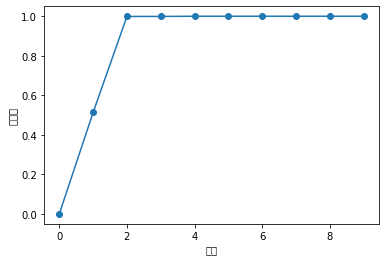

In [16]:
# 그래프 그리기
x = np.arange(len(acc_list))
plt.plot(x, acc_list, marker='o')
plt.xlabel('에폭')
plt.ylabel('정확도')
plt.ylim(-0.05, 1.05)
plt.show()

<a href="https://imgur.com/i24ycyq"><img src="https://i.imgur.com/i24ycyq.png" width="40%" /></a>

<a href="https://imgur.com/IvSzz2O"><img src="https://i.imgur.com/IvSzz2O.png" width="30%" /></a> $\qquad$
<a href="https://imgur.com/0SquO8r"><img src="https://i.imgur.com/0SquO8r.png" width="40%" /></a>

### 8.3.3 어텐션 시각화

<a href="https://imgur.com/bYZhNpF"><img src="https://i.imgur.com/bYZhNpF.png" width="52%" /></a>
<a href="https://imgur.com/qTMMurF"><img src="https://i.imgur.com/qTMMurF.png" width="40%" /></a>


## 8.4 어텐션 주제

> 단방향 RNN vs. 양방향 RNN  

<a href="https://imgur.com/3eoURVF"><img src="https://i.imgur.com/3eoURVF.png" width="40%" /></a> $\qquad$ 
<a href="https://imgur.com/SLjprLr"><img src="https://i.imgur.com/SLjprLr.png" width="40%" /></a>


> `attention` 계층 

<a href="https://imgur.com/Wo9WgkM"><img src="https://i.imgur.com/Wo9WgkM.png" width="40%" /></a> $\qquad$ 
<a href="https://imgur.com/y3dqeCm"><img src="https://i.imgur.com/y3dqeCm.png" width="40%" /></a>



> 심층화 `skip` connection  

+ residual connection  


<a href="https://imgur.com/viRcp5H"><img src="https://i.imgur.com/viRcp5H.png" width="40%" /></a> $\qquad$ 
<a href="https://imgur.com/AjtVcR7"><img src="https://i.imgur.com/AjtVcR7.png" width="20%" /></a>



### 8.5 어텐션의 응용

> Transformer (Attention is all you need)

+ Key, Query, Value 

> BERTs (Transformer Encoder 활용)

+ MLM  

+ Bidirectional 

> GPTs (Transformer Decoder 활용)

+ Unidirectional  




<a href="https://imgur.com/JLHIIQR"><img src="https://i.imgur.com/JLHIIQR.png" width="40%" /></a>

<a href="https://imgur.com/B6vGlmP"><img src="https://i.imgur.com/B6vGlmP.png" width="40%" /></a>



<a href="https://imgur.com/hjkR4VX"><img src="https://i.imgur.com/hjkR4VX.png" width="40%" /></a>

<a href="https://imgur.com/IArFrTJ"><img src="https://i.imgur.com/IArFrTJ.png" width="40%" /></a>

<a href="https://imgur.com/bNm3b1m"><img src="https://i.imgur.com/bNm3b1m.png" width="40%" /></a>

<a href="https://imgur.com/3j9hOnO"><img src="https://i.imgur.com/3j9hOnO.png" width="40%" /></a>